# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization superpowers, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

Instructions:

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using the integration between Plotly and the Mapbox API. Be sure to create your environment file (`.env`) and include your Mapbox API access token. Then import your Mapbox API access token into the `san_francisco_housing.ipynb` notebook, and set it by using the `px.set_mapbox_access_token` function.

Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

##### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

##### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

##### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

##### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

##### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [159]:
# Import the required libraries and dependencies
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import dash

## Enable your Mapbox API access token

In [160]:
# Load the .env file into the notebook
load_dotenv()

# Read in your MAPBOX_API_KEY
map_box_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm the availability of your Mapbox API access token by checking its type
type(map_box_api_access_token)

Python-dotenv could not parse statement starting at line 1


str

In [161]:
# Set your Mapbox API access token
px.set_mapbox_access_token(map_box_api_access_token)

## Import the data 

In [162]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(Path("Resources/sfo_neighborhoods_census_data.csv"), index_col="year")

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390
2016,Visitacion Valley,328.319007,384242,4390
2016,Westwood Park,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [163]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby("year").mean()

growth_6y=housing_units_by_year["housing_units"].pct_change(6).dropna()
average_growth_1y=housing_units_by_year["housing_units"].pct_change().dropna().mean()

# Review the DataFrame
display(housing_units_by_year)
print(f"During the period 2010-2016:")
print(f"Growth of housing units         : {100*growth_6y.iloc[0]:.2f}%" )
print(f"Average Annual growth of housing: {100*average_growth_1y:.2f}%" )

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


During the period 2010-2016:
Growth of housing units         : 3.14%
Average Annual growth of housing: 0.52%


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [164]:
# Create a visual aggregation explore the housing units by year
thousands_of_housing_units_by_year=housing_units_by_year["housing_units"]/1000

thousands_of_housing_units_by_year.hvplot.bar(
    rot=90
    ,title="Housing Units in San Francisco By Year (in Thousands) -- Period 2010-2016"
    ,xlabel= 'Year'
    ,ylabel='Housing Units (Thousands)'
    ,ylim=[300,400]
).opts(
    color='pink')


:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question** What is the overall trend in housing_units over the period being analyzed?

**Answer** # The development of housing is very limited. In 6 years, the increment of housing units in San Francisco is the only 3.14%. Annualy, the average increment of housing units is of only 0.52%. We can say that the trend is flat, meaning, almost not new housing is available every year in the city.

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [165]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby("year").mean()

# Review the resulting DataFrame
prices_square_foot_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [166]:
#OBS: there is no standard deviation among years for the gross_rent. 
# That means, the value presented in the data corresponds to an average.
sfo_data_df[["gross_rent"]].groupby("year").describe()

gross_rent                                                     
          count    mean  std     min     25%     50%     75%     max
year                                                                
2010       59.0  1239.0  0.0  1239.0  1239.0  1239.0  1239.0  1239.0
2011       59.0  1530.0  0.0  1530.0  1530.0  1530.0  1530.0  1530.0
2012       58.0  2324.0  0.0  2324.0  2324.0  2324.0  2324.0  2324.0
2013       57.0  2971.0  0.0  2971.0  2971.0  2971.0  2971.0  2971.0
2014       60.0  3528.0  0.0  3528.0  3528.0  3528.0  3528.0  3528.0
2015       58.0  3739.0  0.0  3739.0  3739.0  3739.0  3739.0  3739.0
2016       46.0  4390.0  0.0  4390.0  4390.0  4390.0  4390.0  4390.0

**Question** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer** # The lowest monthly average rent value is $1,239, and occur in the year 2010.

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [167]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = sfo_data_df.groupby("year").mean()[["sale_price_sqr_foot","gross_rent"]]

# Review the DataFrame
prices_square_foot_by_year

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [168]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year.hvplot(
    xlabel="Year"
    ,ylabel="Sale Price per Sqr Foot \n & Gross Rent \n [US Dollars]"
    ,title="Sale Price per Square Foot & Average Gross Rent, in San Francisco -- 2010-2016"
    ,legend=True
)

:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question** * Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer** # Yes. In the year 2011 the sale price per square footage was $342, dropping a little bit from the 2010 value of $369.

**Question** * If so, did the gross rent increase or decrease during that year?I

**Answer** # It increased, by a significant 23.5% from USD 1,239 to USD 1,530 during that same year.

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [169]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(["year","neighborhood"]).mean()

# Review the DataFrame
prices_by_year_by_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [170]:
#Preparing data for calculating changes in prices
prices_by_year_by_neighborhood.sale_price_sqr_foot.unstack()

neighborhood,Alamo Square,Anza Vista,Bayview,Bayview Heights,Bernal Heights,Buena Vista Park,Central Richmond,Central Sunset,Clarendon Heights,Corona Heights,...,Telegraph Hill,Twin Peaks,Union Square District,Van Ness/ Civic Center,Visitacion Valley,West Portal,Western Addition,Westwood Highlands,Westwood Park,Yerba Buena
year,,,,,,,,,,,,,,,,,,,,,
2010,291.182945,267.932583,170.098665,NaN,NaN,347.394919,319.027623,418.172493,NaN,369.359338,...,524.793509,331.555996,569.193448,108.012927,NaN,392.300764,215.569134,NaN,NaN,333.126774
2011,272.527310,NaN,172.540562,NaN,471.921732,171.772347,261.663800,391.426450,520.718168,222.567848,...,483.405773,284.566966,302.123253,384.236802,NaN,NaN,227.418981,320.074333,NaN,438.860545
2012,183.099317,344.490914,165.798062,NaN,368.266561,338.601164,279.030140,334.487873,NaN,356.794814,...,465.802122,304.899648,445.196788,345.958040,NaN,325.795415,274.338460,NaN,NaN,491.814003
2013,387.794144,453.340498,259.547163,NaN,630.897303,455.218089,343.054261,330.736431,453.771605,NaN,...,653.311617,414.435693,1290.472107,285.009506,293.298372,588.074797,217.089069,747.333538,NaN,753.011413
2014,484.443552,620.441407,254.958662,NaN,544.546929,NaN,423.952727,456.241996,NaN,888.182144,...,708.193032,562.911234,558.271119,475.393187,282.025468,687.782963,429.488317,NaN,742.979723,479.923749
2015,602.115877,465.686275,NaN,590.792839,458.004299,551.695622,473.163815,453.379377,NaN,1100.791194,...,996.990220,417.335379,2258.702832,677.838232,302.221873,NaN,481.469244,NaN,NaN,963.522606
2016,340.981835,88.401511,NaN,NaN,986.842105,851.401405,661.064426,581.370875,NaN,NaN,...,903.049771,970.085470,NaN,552.602567,328.319007,NaN,NaN,NaN,631.195426,NaN


In [171]:
# Calculation of the change in prices per square feet
change_in_prices_by_year=prices_by_year_by_neighborhood.sale_price_sqr_foot.unstack().pct_change()
change_in_prices_by_year.T.sort_values(2016).head(15)

year,2010,2011,2012,2013,2014,2015,2016
neighborhood,,,,,,,
Outer Mission,NaN,NaN,0.560976,0.000000,0.000000,1.545000,-0.927796
Anza Vista,NaN,0.000000,0.285737,0.315972,0.368599,-0.249427,-0.810169
Hayes Valley,NaN,0.031018,0.091359,0.604519,-0.127475,0.250938,-0.673723
Park North,NaN,-0.111686,-0.005273,0.779483,-0.274479,0.657790,-0.657297
Marina,NaN,0.008843,0.139186,0.471644,-0.018864,0.762243,-0.618706
Alamo Square,NaN,-0.064068,-0.328143,1.117944,0.249229,0.242902,-0.433694
Inner Parkside,NaN,0.000000,0.000000,0.000000,1.990458,0.276836,-0.320532
Inner Sunset,NaN,0.097309,0.076748,0.336731,0.081066,0.357421,-0.302314
South of Market,NaN,-0.157943,0.372567,-0.092684,1.661074,-0.359656,-0.259309


### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [172]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood.drop(columns=["housing_units"])

# Review the first and last five rows of the DataFrame
display(prices_by_year_by_neighborhood.head() )
display(prices_by_year_by_neighborhood.tail() )


sale_price_sqr_foot  gross_rent
year neighborhood                                     
2010 Alamo Square               291.182945        1239
     Anza Vista                 267.932583        1239
     Bayview                    170.098665        1239
     Buena Vista Park           347.394919        1239
     Central Richmond           319.027623        1239

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2016 Telegraph Hill                   903.049771        4390
     Twin Peaks                       970.085470        4390
     Van Ness/ Civic Center           552.602567        4390
     Visitacion Valley                328.319007        4390
     Westwood Park                    631.195426        4390

In [173]:
selected_neighborhoods_with_2016_data_df=prices_by_year_by_neighborhood.loc[2016].dropna()
selected_neighborhoods_with_2016_data_df


,sale_price_sqr_foot,gross_rent
neighborhood,,
Alamo Square,340.981835,4390
Anza Vista,88.401511,4390
Bernal Heights,986.842105,4390
Buena Vista Park,851.401405,4390
Central Richmond,661.064426,4390
Central Sunset,581.370875,4390
Cow Hollow,1059.065602,4390
Croker Amazon,566.701176,4390
Downtown,718.776830,4390


### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [174]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood.hvplot(
    groupby="neighborhood"
    ,title="Average Price per Square Foot, and Gross Rent in San Francisco's Neighborhoods"
    ,xlabel="Year"
    ,ylabel="US Dollars"
)


:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer** For the Anza Vista neighborhood, the sale price in per square foot in 2012 was 344.49. The averages sale price per square foot in 2016 was 88.40. The average sale price per square foot is lower in 2016 than it was in 2012.

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?



### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [175]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(Path("Resources/neighborhoods_coordinates.csv"), index_col="Neighborhood")

# Review the DataFrame
neighborhood_locations_df


,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [176]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby("neighborhood").mean()

# Review the resulting DataFrame
all_neighborhood_info_df


,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [177]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN


,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,473.900773,378401.0,2817.285714


In [178]:
# Call the dropna function to remove any neighborhoods that do not have data
#all_neighborhoods_df = all_neighborhoods_df.dropna()
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()


# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())



,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,576.709848,377427.50,2555.166667


In [156]:
#DELETE

#neighborhoods_df=all_neighborhoods_df["Neighborhood"]

In [183]:
all_neighborhoods_df.sort_values("gross_rent")

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
19,Forest Knolls,37.75706,-122.455090,321.840837,374507.00,1781.50
12,Diamond Heights,37.72863,-122.443050,434.991739,375480.50,2016.00
60,South Beach,37.78323,-122.400650,650.124479,375805.00,2099.00
38,Miraloma Park,37.73415,-122.457000,779.810842,375967.25,2155.25
70,Westwood Highlands,37.73470,-122.456854,533.703935,376454.00,2250.50
...,...,...,...,...,...,...
36,Merced Heights,37.71993,-122.465950,788.844818,380348.00,3414.00
59,Silver Terrace,37.73467,-122.401060,170.292549,380348.00,3528.00
67,Visitacion Valley,37.72874,-122.410980,301.466180,381321.50,3657.00
3,Bayview Heights,37.72874,-122.410980,590.792839,382295.00,3739.00


### Step 4: Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `size_max` parameter to “25”.
    * Set the `zoom` parameter to “11”.

### Step 5: Style and format the line plot to ensure a professionally styled visualization.


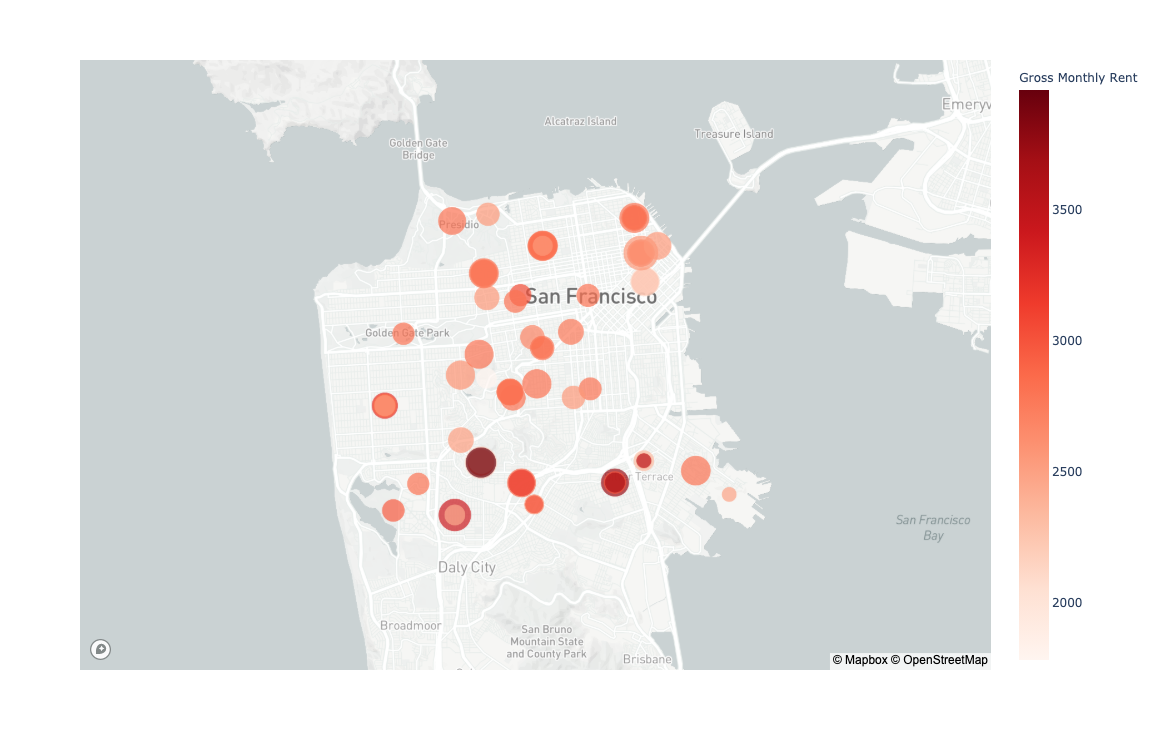

In [185]:
px.scatter_mapbox(
    all_neighborhoods_df
    ,size="sale_price_sqr_foot"
    ,color="gross_rent"
    ,lat="Lat"
    ,lon="Lon"
    ,size_max=25
    ,zoom=11
    ,color_continuous_scale="reds"
    ,hover_name="Neighborhood"
    ,hover_data={'Lat':False, 'Lon':False, "sale_price_sqr_foot":":.0f","gross_rent":":,.0f" }
    ,height=750
    ,width=750
    ,labels={"sale_price_sqr_foot":"Sale Price per Square Foot","gross_rent":"Gross Monthly Rent"}
)


### Step 7: Use the interactive map to answer the following question:

**Question** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer** # The highest sale price per square foot is in Union Square District at USD 904, which can be found by the larger circle in the map. The data provided about rent is the average rent for the full city. Some neirborhoods appear with a different amount, because the average is made across all years, and some of them are missing some dates. That is why the data appear so similar among the different neirborhoods. If we make this average across time for each neirborhood, we get that highest gross rent is in Westwood Park with a $3,959 monthly, which can be found by the darker red on the map, because it only has data points for 2016 and 2014.

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer** # The trend in rental income growth have been amazingly increasing in the period 2010-2016. At a pace that is much higher than the rice in prices. Then, it looks like a very good deal to buy a house and rented in San Francisco. There is not data that distinguish rates of rentals among neighborhoods. However, there is data for the trends in sale prices by neighborhood, which shows that not all neirghborhoods are having the same level of appreciation. Some of them have negative appreciation.  
By looking at the "Average Price per Square Foot, and Gross Rent in San Francisco's Neighborhoods", and check out the table called "Price Appreciation" that is below these questions&answers. At the column "sale_price_appreciation", we can see a list of neighborhoods with negative appreciation in 2016, such as Hayes Valley, Marina, Inner Sunset, Potrero Hill, the Telegraph Hill, among others. Doing a similar calculation with data from the year 2021 can provide a set of neirborhoods that have been strongly affected by the pandemic, and can represent a good option to invest to rent those properties.
